In [2]:
#importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
#reading the csv file
df=pd.read_csv("Student_scores.csv")
df.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [4]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [6]:
#to identify how many null values
df.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

In [14]:
# Check if the column exists before dropping it
column_name = "Unnamed: 0"
if column_name in df.columns:
    df = df.drop(column_name, axis=1)
    print("Column '{}' dropped successfully.".format(column_name))
else:
    print("Column '{}' not found in DataFrame.".format(column_name))

Column 'Unnamed: 0' not found in DataFrame.


In [16]:
df.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


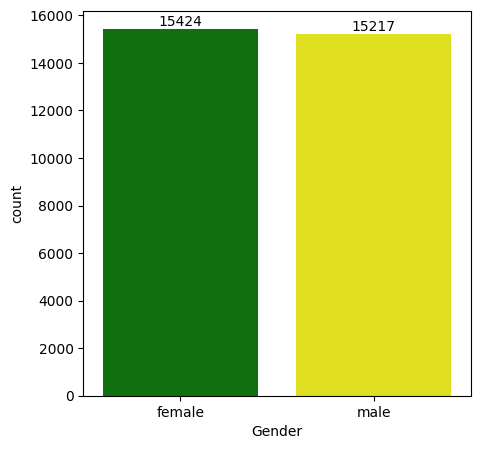

In [31]:
#gender distribution
plt.figure(figsize=(5,5))
colors = ["green", "yellow"]
ax=sns.countplot(data=df,hue="Gender",x="Gender",palette=colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Gender Distribution")
plt.show()


In [ ]:
#from the above we have analysed that the number of females are more that that of males

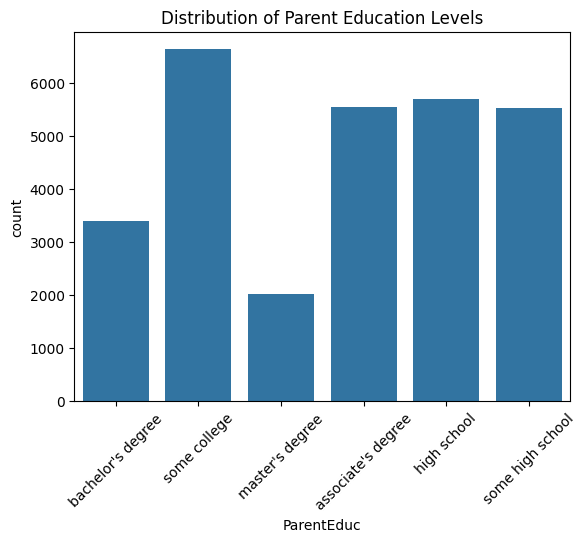

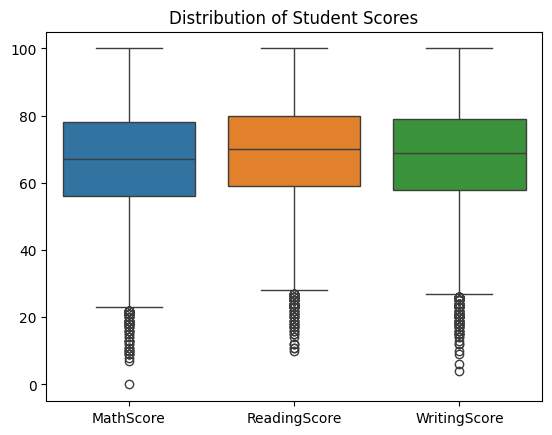

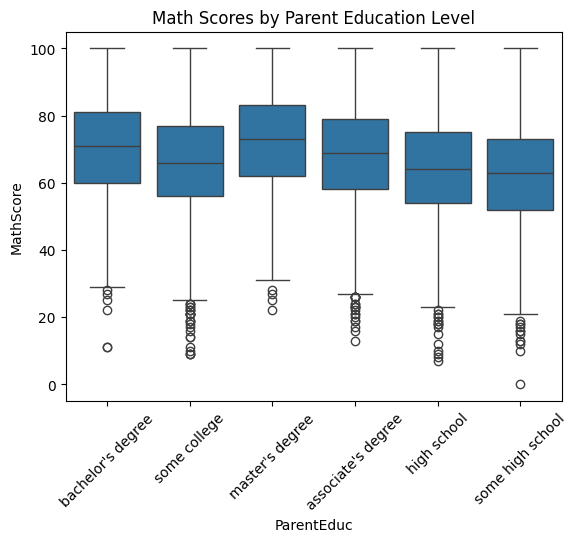

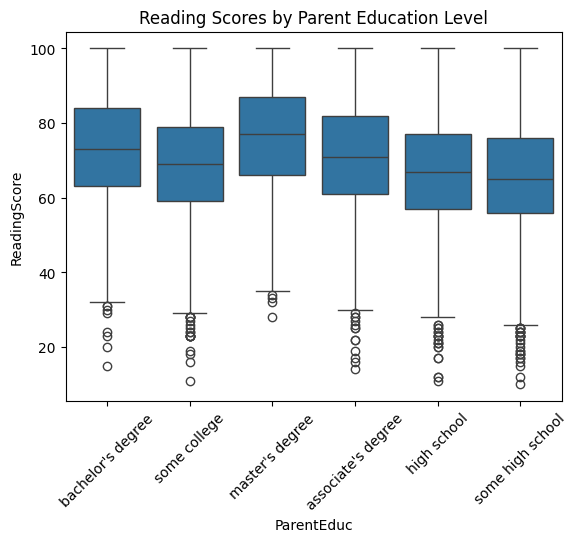

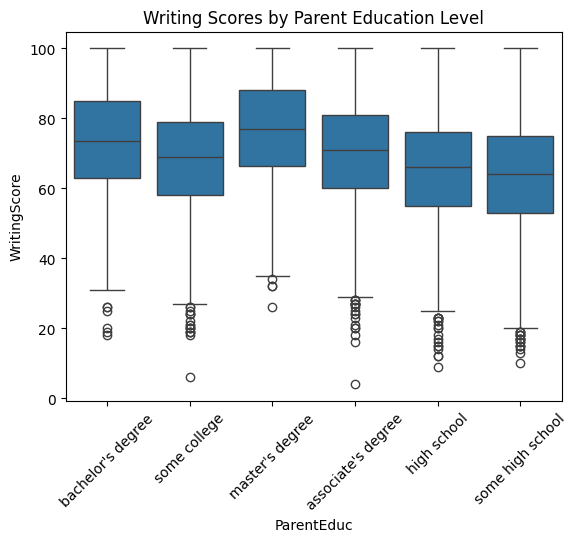

In [35]:
# next analysis is of the impact of parent education on the scores of the student
# Perform exploratory data analysis (EDA)
# Visualize the distribution of parent education levels
sns.countplot(x='ParentEduc', data=df)
plt.title('Distribution of Parent Education Levels')
plt.xticks(rotation=45)
plt.show()

# Visualize the distribution of student scores
sns.boxplot(data=df[['MathScore', 'ReadingScore', 'WritingScore']])
plt.title('Distribution of Student Scores')
plt.show()

# Explore the relationship between parent education and student scores
# You can use box plots to visualize the distribution of scores across different education levels
sns.boxplot(x='ParentEduc', y='MathScore', data=df)
plt.title('Math Scores by Parent Education Level')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='ParentEduc', y='ReadingScore', data=df)
plt.title('Reading Scores by Parent Education Level')
plt.xticks(rotation=45)
plt.show()

sns.boxplot(x='ParentEduc', y='WritingScore', data=df)
plt.title('Writing Scores by Parent Education Level')
plt.xticks(rotation=45)
plt.show()

In [39]:
gb=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean','WritingScore':'mean'})
print(gb)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


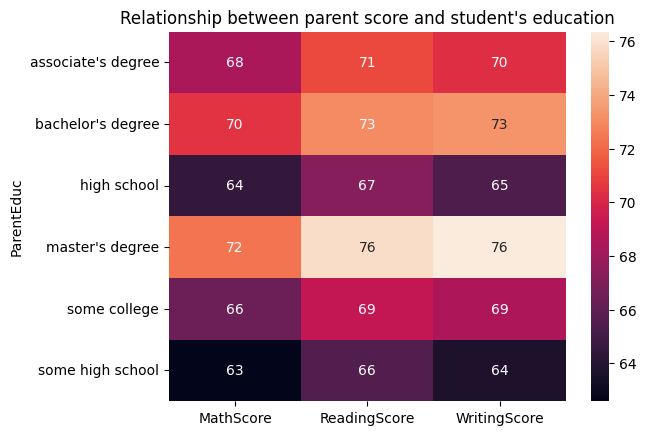

In [46]:
#plotting in a heatmap
sns.heatmap(gb,annot=True)
plt.title("Relationship between parent score and student's education")
plt.show()

In [42]:
#from the above charts we have concluded that the education of parents have a good impact on their education

In [43]:
gb1=df.groupby("ParentEduc").agg({"MathScore":'mean',"ReadingScore":'mean','WritingScore':'mean'})
print(gb1)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.365586     71.124324     70.299099
bachelor's degree   70.466627     73.062020     73.331069
high school         64.435731     67.213997     65.421136
master's degree     72.336134     75.832921     76.356896
some college        66.390472     69.179708     68.501432
some high school    62.584013     65.510785     63.632409


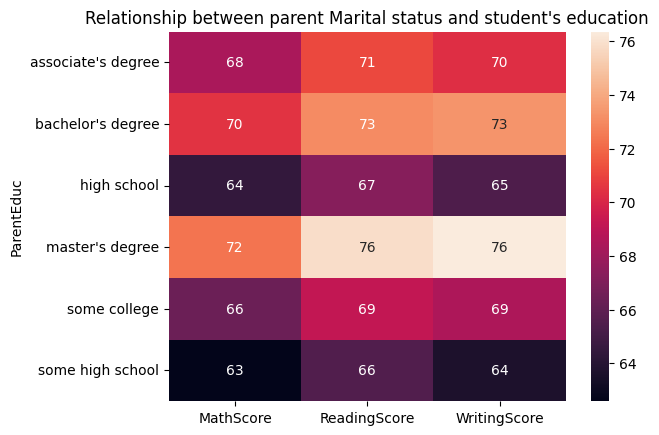

In [47]:
#plotting in a heatmap
sns.heatmap(gb1,annot=True)
plt.title("Relationship between parent Marital status and student's education")
plt.show()

In [45]:
#from the above chart we have concluded that the their is no/negligible impact on the student's score due to their parents marital status

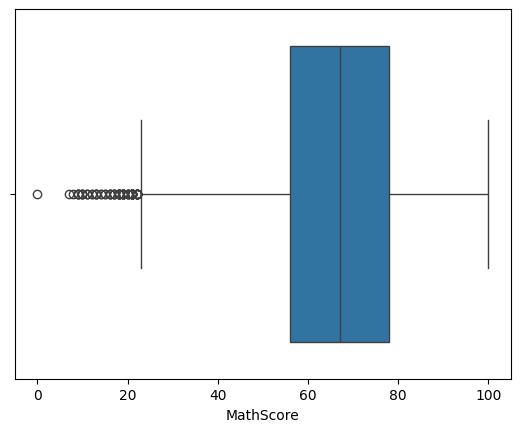

In [49]:
#boxplot() is generally used to detrmine the outliers
#checking for the maths score
sns.boxplot(data=df,x="MathScore")
plt.show()

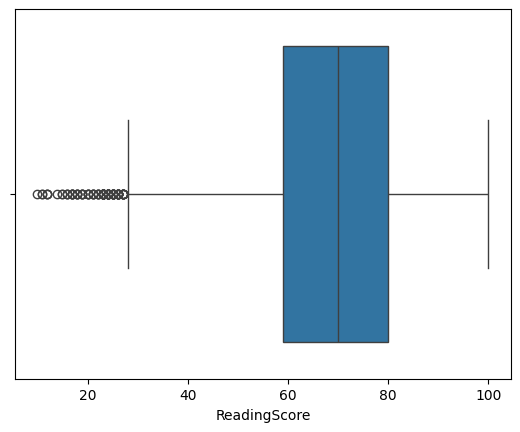

In [50]:
#similarly we plot for all the other student
sns.boxplot(data=df,x="ReadingScore")
plt.show()

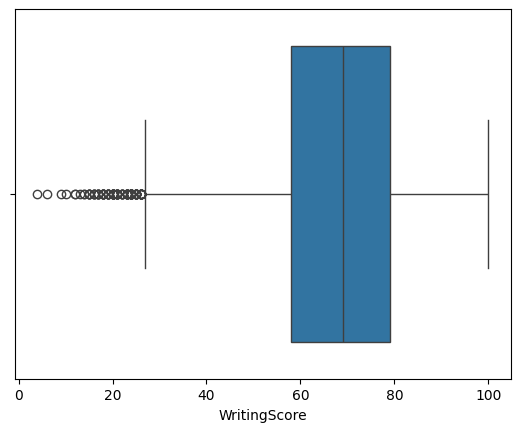

In [51]:
sns.boxplot(data=df,x="WritingScore")
plt.show()

In [52]:
# from the above boxplot we can conclude that
# maths is comparatively difficult subject to score

In [54]:
#checking out how many ethnic groups are there
print(df["EthnicGroup"].unique())

[nan 'group C' 'group B' 'group A' 'group D' 'group E']


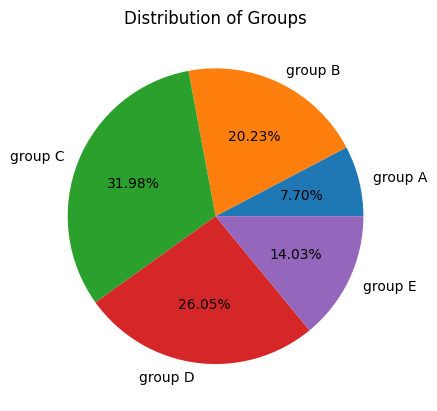

In [63]:
groupA = df.loc[(df['EthnicGroup'] == "group A")].count()

groupB = df.loc[(df['EthnicGroup'] == "group B")].count()

groupC = df.loc[(df['EthnicGroup'] == "group C")].count()

groupD = df.loc[(df['EthnicGroup'] == "group D")].count()

groupE = df.loc[(df['EthnicGroup'] == "group E")].count()

l = ["group A", "group B", "group C", "group D", 'group E']
mlist = [groupA ["EthnicGroup"], groupB ["EthnicGroup"], groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(mlist, labels=l, autopct="%1.2f%%")
plt.title("Distribution of Groups")
plt.show()


[Text(0, 0, '4041')]

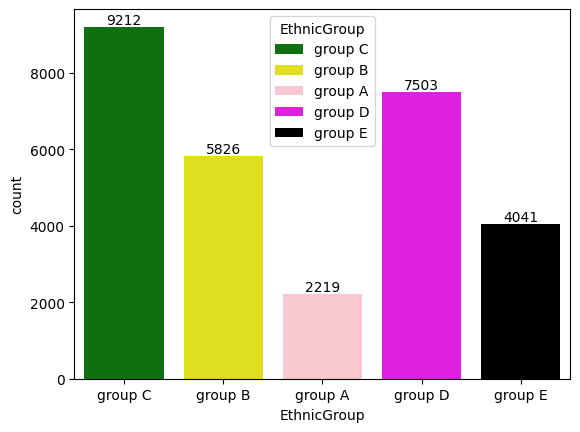

In [68]:
colors = ["green", "yellow","pink","magenta","black"]
ax=sns.countplot(data=df,hue="EthnicGroup",x='EthnicGroup',palette=colors)
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
ax.bar_label(ax.containers[3])
ax.bar_label(ax.containers[4])